# Threat Plotting

Notebook for demonstrating the QTT's plotting functionalities.

As quantum computing hardware advances, the threat that it poses against cryptographic protocols may change over time. In particular, as specifications such as gate error rates and gate times improve, protocols may be broken with shorter algorithm runtimes. The purpose of this notebook is to showcase the QTT's ability to plot this evolving threat.

## Hardware Roadmap

In the following, we define a hardware roadmap for future superconducting quantum computers. In addition to qubit count doubling every 2 years, we assume that the error rate decreases by 20%, and the measurement and gate times decrease by 10%.

In [1]:
from quantumthreattracker.lifespan_estimator import HardwareRoadmap

hardware_roadmap = HardwareRoadmap()


for i in range(20):
    max_qubits = 1000 * (2**i)
    error_rate = 1e-3 * 0.8**i
    measurement_time = str(100 * 0.9**i) + " ns"
    gate_time = str(50 * 0.9**i) + " ns"
    params = {
        "qubitParams": {
            "name": "Custom",
            "instructionSet": "GateBased",
            "oneQubitMeasurementTime": measurement_time,
            "oneQubitGateTime": gate_time,
            "twoQubitGateTime": gate_time,
            "tGateTime": gate_time,
            "oneQubitMeasurementErrorRate": error_rate,
            "oneQubitGateErrorRate": error_rate,
            "twoQubitGateErrorRate": error_rate,
            "tGateErrorRate": error_rate,
        },
        "constraints": {
            "maxPhysicalQubits": max_qubits
        }
    }
    hardware_roadmap.add(timestamp=1735689600 + 31536000 * 2 * i, estimator_params=params)

In [2]:
from quantumthreattracker.lifespan_estimator import LifespanEstimator

lifespan_estimator = LifespanEstimator(hardware_roadmap)

lifespan_estimator.generate_report(protocols=[{"algorithm": "RSA", "keySize": 2048}])

## Plotting

If the `protocol` argument is specified in the `plot_threats` method, the QTT will plot the threats over time for that protocol.

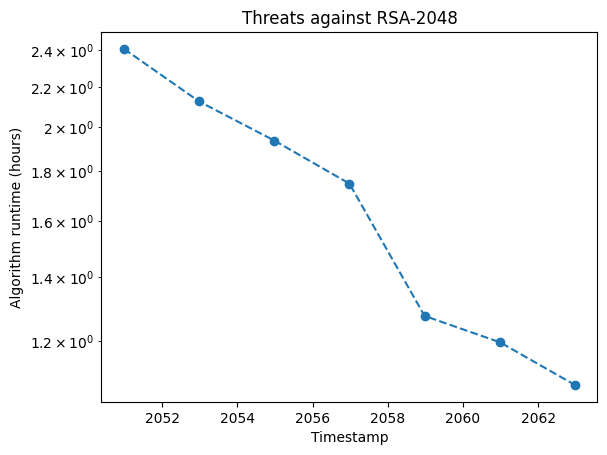

In [3]:
import matplotlib.pyplot as plt

ax = lifespan_estimator.plot_threats(protocol="RSA-2048")
plt.show()